![ ](https://www.pon-cat.com/application/files/7915/8400/2602/home-banner.jpg)

# <center> **Data Visualization and Exploratory Data Analysis** </center>

Visualization is an important part of data analysis. By presenting information visually, you facilitate the process of its perception, which makes it possible to highlight additional patterns, evaluate the ratios of quantities, and quickly communicate key aspects in the data.

Let's start with a little "memo" that should always be kept in mind when creating any graphs.

### <center> How to visualize data and make everyone hate you </center>

1. Chart **titles** are unnecessary. It is always clear from the graph what data it describes.
2. Do not label under any circumstances both **axes** of the graph. Let the others check their intuition!
3. **Units** are optional. What difference does it make if the quantity was measured, in people or in liters!
4. The smaller the **text** on the graph, the sharper the viewer's eyesight.
5. You should try to fit all the **information** that you have in the dataset in one chart. With full titles, transcripts, footnotes. The more text, the more informative!
6. Whenever possible, use as many 3D and special effects as you have. There will be less visual distortion rather than 2D.

As an example, consider the pandemic case. Let's use a dataset with promptly updated statistics on coronavirus (COVID-19), which is publicly available on Kaggle: https://www.kaggle.com/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv

The main libraries for visualization in Python that we need today are **matplotlib, seaborn, plotly**. 

In [1]:
# Download required binded packages
!pip install plotly-express
!pip install nbformat==4.2.0
!pip install plotly

In [3]:
import matplotlib.pyplot as plt # the most popular library for plots
%matplotlib inline
import numpy as np
import seaborn as sns #fancier library for plots 
import pandas as pd
import pickle # for JSON serialization
import plotly # interactive plots 
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

%config InlineBackend.figure_format = 'svg' #  graphs in svg look sharper

# Change the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

import warnings
warnings.filterwarnings('ignore')

We read the data and look at the number of countries in the dataset and what time period it covers.

In [4]:
data = pd.read_csv('./data/covid_19_clean.csv')

In [4]:
data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


How many countries there are in this table?

In [5]:
data['Country/Region'].nunique()

187

In [6]:
data.shape

(49068, 10)

In [7]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [8]:
float(-1.400000e+01)

-14.0

In [13]:
# 49068 rows
data[data['Active'] >= 0]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [15]:
data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [16]:
min(data['Date'])

'2020-01-22'

In [18]:
data.describe(include=['float', 'int', 'object'])

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,14664,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,78,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,Yukon,China,NaN,NaN,2020-04-13,NaN,NaN,NaN,NaN,Europe
freq,188,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,NaN,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
std,NaN,NaN,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN


How many cases in average were confirmed per report? Metrics of centrality:

In [19]:
data['Confirmed'].mode()

0    0
dtype: int64

In [21]:
data.iloc[:50]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


Problems:
1. Data includes too many zeros (there were no active cases yet in these countries)
2. Answering to another question: what is the median across all the records (all the rows) for this column?

In [30]:
data[data['Country/Region'] == 'India'].iloc[:50]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
1434,NaN,India,20.593684,78.96288,2020-01-27,0,0,0,0,South-East Asia
1695,NaN,India,20.593684,78.96288,2020-01-28,0,0,0,0,South-East Asia
1956,NaN,India,20.593684,78.96288,2020-01-29,0,0,0,0,South-East Asia
2217,NaN,India,20.593684,78.96288,2020-01-30,1,0,0,1,South-East Asia
2478,NaN,India,20.593684,78.96288,2020-01-31,1,0,0,1,South-East Asia


In [22]:
data['Confirmed'].median()

168.0

What is the median number of confirmed cases across all countries in total (= based on the information on the last date from this table)?

In [28]:
data[data['Date'] == max(data['Date'])]['Confirmed'].median()

1879.0

In [23]:
data['Confirmed'].mean()

16884.90425531915

In [27]:
data[data['Country/Region'] == 'Argentina'].iloc[50:100]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
13056,NaN,Argentina,-38.4161,-63.6167,2020-03-12,19,1,0,18,Americas
13317,NaN,Argentina,-38.4161,-63.6167,2020-03-13,31,2,0,29,Americas
13578,NaN,Argentina,-38.4161,-63.6167,2020-03-14,34,2,1,31,Americas
13839,NaN,Argentina,-38.4161,-63.6167,2020-03-15,45,2,1,42,Americas
14100,NaN,Argentina,-38.4161,-63.6167,2020-03-16,56,2,1,53,Americas
14361,NaN,Argentina,-38.4161,-63.6167,2020-03-17,68,2,3,63,Americas
14622,NaN,Argentina,-38.4161,-63.6167,2020-03-18,79,2,3,74,Americas
14883,NaN,Argentina,-38.4161,-63.6167,2020-03-19,97,3,3,91,Americas
15144,NaN,Argentina,-38.4161,-63.6167,2020-03-20,128,3,3,122,Americas
15405,NaN,Argentina,-38.4161,-63.6167,2020-03-21,158,4,3,151,Americas


What is the maximum number of confirmed cases in every country?

In [31]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [35]:
data.groupby('Country/Region')['Confirmed'].agg(max).sort_values(ascending=False)[:10]

Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     300111
Iran               293606
Name: Confirmed, dtype: int64

In [36]:
data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
US                       4290259
Brazil                   2442375
India                    1480073
Russia                    816680
South Africa              452529
                          ...   
Dominica                      18
Saint Kitts and Nevis         17
Greenland                     14
Holy See                      12
Western Sahara                10
Name: Confirmed, Length: 187, dtype: int64

More info on groupby: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

* **mean()**: Compute mean of groups

* **sum()**: Compute sum of group values

* **size()**: Compute group sizes

* **count()**: Compute count of group

* **std()**: Standard deviation of groups

* **var()**: Compute variance of groups

* **sem()**: Standard error of the mean of groups

* **describe()**: Generates descriptive statistics

* **first()**: Compute first of group values

* **last()**: Compute last of group values

* **nth()** : Take nth value, or a subset if n is a list

* **min()**: Compute min of group values

* **max()**: Compute max of group values

You can see several characteristics at once (mean, median, prod, sum, std,
var) - both in DataFrame and Series:

In [39]:
data.groupby('Country/Region')['Confirmed'].agg(['mean', 'std', 'size'])

,mean,std,size
Country/Region,,,
Afghanistan,10299.946809,13458.792417,188
Albania,1046.287234,1264.372255,188
Algeria,6275.292553,7339.328093,188
Andorra,502.148936,371.460824,188
Angola,120.542553,214.148815,188
...,...,...,...
West Bank and Gaza,1241.813830,2513.959434,188
Western Sahara,4.792553,4.172042,188
Yemen,357.340426,548.353443,188


In [40]:
data.pivot_table(columns='WHO Region', index='Date', values='Confirmed', aggfunc='sum')

WHO Region,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
Date,,,,,,
2020-01-22,0,1,0,0,2,552
2020-01-23,0,1,0,0,3,650
2020-01-24,0,2,0,2,5,932
2020-01-25,0,2,0,3,8,1421
2020-01-26,0,6,0,3,9,2100
...,...,...,...,...,...,...
2020-07-23,656696,8294228,1439937,3216701,1625727,277192
2020-07-24,677376,8460627,1453830,3239712,1679154,280946
2020-07-25,694057,8609554,1467209,3259047,1732350,284973


In [ ]:
data['Active'] > 0

What are the countries from the Western Pacific region in this data set?

In [44]:
data[data['WHO Region'] == 'Western Pacific']['Country/Region'].unique()

array(['Australia', 'Brunei', 'Cambodia', 'China', 'Fiji', 'Japan',
       'South Korea', 'Malaysia', 'Mongolia', 'New Zealand',
       'Papua New Guinea', 'Philippines', 'Singapore', 'Taiwan*',
       'Vietnam', 'Laos'], dtype=object)

In [45]:
data[(data['WHO Region'] == 'Western Pacific') & (data['Confirmed'] > data.Confirmed.mean())]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
3715,Hubei,China,30.975600,112.270700,2020-02-05,19665,549,633,18483,Western Pacific
3976,Hubei,China,30.975600,112.270700,2020-02-06,22112,618,817,20677,Western Pacific
4237,Hubei,China,30.975600,112.270700,2020-02-07,24953,699,1115,23139,Western Pacific
4498,Hubei,China,30.975600,112.270700,2020-02-08,27100,780,1439,24881,Western Pacific
4759,Hubei,China,30.975600,112.270700,2020-02-09,29631,871,1795,26965,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48740,NaN,Singapore,1.283300,103.833300,2020-07-26,50369,27,45521,4821,Western Pacific
48868,Hubei,China,30.975600,112.270700,2020-07-27,68135,4512,63623,0,Western Pacific
48944,NaN,Japan,36.204824,138.252924,2020-07-27,31142,998,21970,8174,Western Pacific
48987,NaN,Philippines,12.879721,121.774017,2020-07-27,82040,1945,26446,53649,Western Pacific


In [46]:
data[(data['WHO Region'] == 'Western Pacific') & (data['Confirmed'] > data.Confirmed.mean())]['Country/Region'].unique()

array(['China', 'Singapore', 'Philippines', 'Japan'], dtype=object)

In [48]:
some_countries = ['Singapore', 'Japan']

In [49]:
data[data['Country/Region'].isin(some_countries)]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
137,NaN,Japan,36.204824,138.252924,2020-01-22,2,0,0,2,Western Pacific
194,NaN,Singapore,1.283300,103.833300,2020-01-22,0,0,0,0,Western Pacific
398,NaN,Japan,36.204824,138.252924,2020-01-23,2,0,0,2,Western Pacific
455,NaN,Singapore,1.283300,103.833300,2020-01-23,1,0,0,1,Western Pacific
659,NaN,Japan,36.204824,138.252924,2020-01-24,2,0,0,2,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48479,NaN,Singapore,1.283300,103.833300,2020-07-25,49888,27,45352,4509,Western Pacific
48683,NaN,Japan,36.204824,138.252924,2020-07-26,30548,998,21606,7944,Western Pacific
48740,NaN,Singapore,1.283300,103.833300,2020-07-26,50369,27,45521,4821,Western Pacific
48944,NaN,Japan,36.204824,138.252924,2020-07-27,31142,998,21970,8174,Western Pacific


Let's make a small report:

In [52]:
data = pd.read_csv('./data/covid_19_clean.csv')

print("Number of countries: ", data['Country/Region'].nunique())
print(f"Day from {min(data['Date'])} till {max(data['Date'])}, overall {data['Date'].nunique()} days.")

display(data[data['Country/Region'] == 'Russia'].tail())

data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')

Number of countries:  187
Day from 2020-01-22 till 2020-07-27, overall 188 days.


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
47948,NaN,Russia,61.52401,105.318756,2020-07-23,793720,12873,579295,201552,Europe
48209,NaN,Russia,61.52401,105.318756,2020-07-24,799499,13026,587728,198745,Europe
48470,NaN,Russia,61.52401,105.318756,2020-07-25,805332,13172,596064,196096,Europe
48731,NaN,Russia,61.52401,105.318756,2020-07-26,811073,13249,599172,198652,Europe
48992,NaN,Russia,61.52401,105.318756,2020-07-27,816680,13334,602249,201097,Europe


The coronavirus pandemic is a clear example of an exponential distribution. To demonstrate this, let's build a graph of the total number of infected and dead. We will use a linear chart type (** Line Chart **), which can reflect the dynamics of one or several indicators. It is convenient to use it to see how a value changes over time.

In [ ]:
data[['Confirmed', 'Date']].groupby('Date').plot();

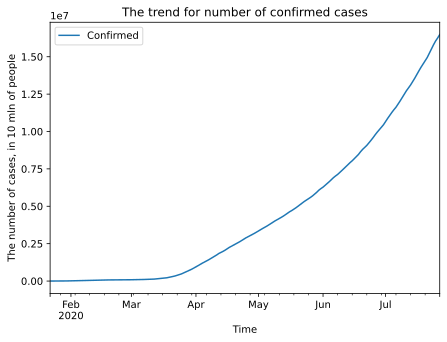

In [58]:
# Line chart

ax = data[['Confirmed', 'Date']].groupby('Date').sum().plot(title='The trend for number of confirmed cases')
ax.set_xlabel("Time")
ax.set_ylabel("The number of cases, in 10 mln of people");

# TODO
# Change the title and axes names

The graph above shows us general information around the world. Let's select the 10 most affected countries (based on the results of the last day from the dataset) and on one **Line Chart** show data for each of them according to the number of registered cases of the disease. This time, let's try using the **plotly** library.

In [5]:
# Preparation steps fot the table

# Extract the top 10 countries by the number of confirmed cases
df_top = data[data['Date'] == max(data.Date)]
df_top = df_top.groupby('Country/Region', as_index=False)['Confirmed'].sum()
df_top = df_top.nlargest(10,'Confirmed')

# Extract trend across time
df_trend = data.groupby(['Date','Country/Region'], as_index=False)['Confirmed'].sum()
df_trend = df_trend.merge(df_top, on='Country/Region')
df_trend.rename(columns={'Country/Region' : 'Countries', 
                         'Confirmed_x':'Cases',
                         'Date' : 'Dates'}, 
                inplace=True)

In [6]:
# Plot a graph
# px stands for plotly_express
px.line(df_trend, 
        title='Increased number of cases of COVID-19',
        x='Dates', 
        y='Cases', 
        color='Countries')

Let's put a logarithm on this column. 

In [ ]:
# Add a column to visualize the logarithmic
df_trend['ln(Cases)'] = np.log(df_trend['Cases'] + 1) # Add 1 for log (0) case

px.line(df_trend, 
        x='Dates', 
        y='ln(Cases)', 
        color='Countries', 
        title='COVID19 Total Cases growth for top 10 worst affected countries(Logarithmic Scale)')

What interesting conclusions can you draw from this graph?

Try to do similar graphs for the deaths and active cases.

In [ ]:
# TODO

Another popular chart is the **Pie chart**. Most often, this graph is used to visualize the relationship between parts (ratios).

In [ ]:
# Pie chart

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
labels_donut = [country for country in df_top['Country/Region']]
fig.add_trace(go.Pie(labels=labels_donut, hole=.4, hoverinfo="label+percent+name", 
                     values=[cases for cases in df_top.Confirmed], 
                     name="Ratio", ), 1, 1)
labels_pie = [country for country in df_top['Country/Region']]
fig.add_trace(go.Pie(labels=labels_pie, pull=[0, 0, 0.2, 0], 
                     values=[cases for cases in df_top.Confirmed], 
                     name="Ratio"), 1, 2)

fig.update_layout(
    title_text="Donut & Pie Chart: Distribution of COVID-19 cases among the top-10 affected countries",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text=' ', x=0.5, y=0.5, font_size=16, showarrow=False)],
    colorway=['rgb(69, 135, 24)', 'rgb(136, 204, 41)', 'rgb(204, 204, 41)', 
              'rgb(235, 210, 26)', 'rgb(209, 156, 42)', 'rgb(209, 86, 42)', 'rgb(209, 42, 42)', ])
fig.show()

In the line graphs above, we have visualized aggregate country information by the number of cases detected. Now, let's try to plot a daily trend chart by calculating the difference between the current value and the previous day's value.
For this purpose, we will use a histogram (**Histogram**). Also, let's add pointers to key events, for example, lockdown dates in Wuhan province in China, Italy and the UK.

In [ ]:
# Histogram

def add_daily_diffs(df):
    # 0 because the previous value is unknown
    df.loc[0,'Cases_daily'] = 0
    df.loc[0,'Deaths_daily'] = 0
    for i in range(1, len(df)):
        df.loc[i,'Cases_daily'] = df.loc[i,'Confirmed'] - df.loc[i - 1,'Confirmed']
        df.loc[i,'Deaths_daily'] = df.loc[i,'Deaths'] - df.loc[i - 1,'Deaths']
    return df

df_world = data.groupby('Date', as_index=False)['Deaths', 'Confirmed'].sum()
df_world = add_daily_diffs(df_world)

fig = go.Figure(data=[
    go.Bar(name='The number of cases',
           marker={'color': 'rgb(0,100,153)'},
           x=df_world.Date, 
           y=df_world.Cases_daily),
    go.Bar(name='The number of cases', x=df_world.Date, y=df_world.Deaths_daily)
])

fig.update_layout(barmode='overlay', title='Statistics on the number of Confirmed and Deaths from COVID-19 across the world',
                 annotations=[dict(x='2020-01-23', y=1797, text="Lockdown (Wuhan)", 
                                   showarrow=True, arrowhead=1, ax=-100, ay=-200),
                              dict(x='2020-03-09', y=1797, text="Lockdown (Italy)", 
                                   showarrow=True, arrowhead=1, ax=-100, ay=-200),
                              dict(x='2020-03-23', y=19000, text="Lockdown (UK)", 
                                   showarrow=True, arrowhead=1, ax=-100, ay=-200)])
fig.show()

In [ ]:
# Save 
plotly.offline.plot(fig, filename='my_beautiful_histogram.html', show_link=False)

A histogram is often mistaken for a bar chart due to its visual similarity, but these charts have different purposes. The bar graph shows how the data is distributed over a continuous interval or a specific period of time. Frequency is located along the vertical axis of the histogram, intervals or some time period along the horizontal axis.

Let's build the **Bar Chart** now. It can be vertical and horizontal, let's choose the second option.
Let's build a graph only for the top 20 countries in mortality. We will calculate this statistics as the ratio of the number of deaths to the number of confirmed cases for each country.

For some countries in the dataset, statistics are presented for each region (for example, for all US states). For such countries, we will leave only one (maximum) value. Alternatively, one could calculate the average for the regions and leave it as an indicator for the country.

In [ ]:
# Bar chart

df_mortality = data.query('(Date == "2020-07-17") & (Confirmed > 100)') 
df_mortality['mortality'] = df_mortality['Deaths'] / df_mortality['Confirmed']
df_mortality['mortality'] = df_mortality['mortality'].apply(lambda x: round(x, 3))
df_mortality.sort_values('mortality', ascending=False, inplace=True)
# Keep the maximum mortality rate for countries for which statistics are provided for each region.
df_mortality.drop_duplicates(subset=['Country/Region'], keep='first', inplace=True)

fig = px.bar(df_mortality[:20].iloc[::-1],
             x='mortality', 
             y='Country/Region',
             labels={'mortality': 'Death rate', 'Country\Region': 'Country'},
             title=f'Death rate: top-20 affected countries on 2020-07-17', 
             text='mortality', 
             height=800, 
             orientation='h') # горизонтальный
fig.show()

# TODO: раскрасить столбцы по тепловой карте (используя уровень смерности)
# Для этого добавьте аргументы color = 'mortality'

**Heat Maps** quite useful for additional visualization of correlation matrices between features. When there are a lot of features, with the help of such a graph you can more quickly assess which features are highly correlated or do not have a linear relationship.

In [ ]:
# Heat map
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='cividis'); # try another color, e.g.'RdBu'

The scatter plot helps to find the relationship between the two indicators. To do this, you can use pairplot, which will immediately display a histogram for each variable and a scatter plot for two variables (along different plot axes).

In [ ]:
# Pairplot
sns_plot = sns.pairplot(data[['Deaths', 'Confirmed']])
sns_plot.savefig('pairplot.png') # save

**Pivot table** can automatically sort and aggregate your data.

In [ ]:
# Pivot table

plt.figure(figsize=(12, 4))
df_new = df_mortality.iloc[:10]
df_new['Confirmed'] = df_new['Confirmed'].astype(np.int)
df_new['binned_fatalities'] = pd.cut(df_new['Deaths'], 3)
platform_genre_sales = df_new.pivot_table(
                        index='binned_fatalities', 
                        columns='Country/Region', 
                        values='Confirmed', 
                        aggfunc=sum).fillna(int(0)).applymap(np.int)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.7, cmap="viridis");

In [ ]:
# Geo

# file with abbreviations 
with open('./data/countries_codes.pkl', 'rb') as file:
    countries_codes = pickle.load(file)
    
df_map = data.copy()
df_map['Date'] = data['Date'].astype(str)
df_map = df_map.groupby(['Date','Country/Region'], as_index=False)['Confirmed','Deaths'].sum()
df_map['iso_alpha'] = df_map['Country/Region'].map(countries_codes)
df_map['ln(Confirmed)'] = np.log(df_map.Confirmed + 1)
df_map['ln(Deaths)'] = np.log(df_map.Deaths + 1)

px.choropleth(df_map, 
              locations="iso_alpha", 
              color="ln(Confirmed)", 
              hover_name="Country/Region",
              hover_data=["Confirmed"],
              animation_frame="Date",
              color_continuous_scale=px.colors.sequential.OrRd,
              title = 'Total Confirmed Cases growth (Logarithmic Scale)')

What important information did the new graph provide (visualization by time and geolocation)? Is it possible to answer the questions according to the schedule:
* Which country did the spread of the coronavirus start from?
* Which countries are most affected by the pandemic?
* What part of the hemisphere accounts for the majority of cases? What hypotheses can be formulated regarding the temperature and rate of spread of the virus?

What other observations can you make from the graph?

### **Recommended materials**

1. Matplotlib documentation https://matplotlib.org/3.2.1/tutorials/index.html 
2. Seaborn documentation https://seaborn.pydata.org/tutorial.html
3. Plotly https://plotly.com/python/ 
4. [Kaggle COVID19-Explained through Visualizations](https://www.kaggle.com/anshuls235/covid19-explained-through-visualizations/#data)
5. Open Data Science lecture on these topics:
https://www.youtube.com/watch?v=fwWCw_cE5aI&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX&index=2

https://www.youtube.com/watch?v=WNoQTNOME5g&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX&index=3

### **Additional libraries**:
* Bokeh
* ggplot
* geoplotlib
* pygal
